## Wine Explore

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from math import sqrt
# to turn off pink warning boxes basically for display purposes in class
import warnings
warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import tools for scaling
import sklearn.preprocessing

# classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# classification analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# linear regression algorithms/prep
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# regression analysis
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# clustering algorithms
from sklearn.cluster import KMeans


# feature selection
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

# to see local file system
import os

# import our own modules
from acquire import get_wine_data
# import env
# import wrangle as w
import prepare as p
# import summarize as s

np.random.seed = 9751

# jupyter settings
%matplotlib inline

# pandas DataFrame formatting
pd.options.display.float_format = '{:20,.2f}'.format
# The "20" indicates that the output should be padded with spaces to a width of 20 characters.
# The "," specifies that a comma should be used as a thousands separator.
# The ".2f" indicates that the value should be displayed with two decimal places.

In [42]:
wines = p.prep_wine_data(get_wine_data())

In [43]:
wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,1
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,1
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,1
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,1
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,1


In [44]:
# I want to start my exploration by splitting the wines into whites and reds for EDA

In [71]:
whites = wines[wines.is_red == 0].drop(columns='is_red')

In [72]:
reds = wines[wines.is_red == 1].drop(columns='is_red')

In [70]:
# let's see how many whites to reds
whites.shape, reds.shape

((4898, 13), (1599, 12))

In [50]:
cols = wines.drop(columns='is_red').columns.to_list()

In [51]:
cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

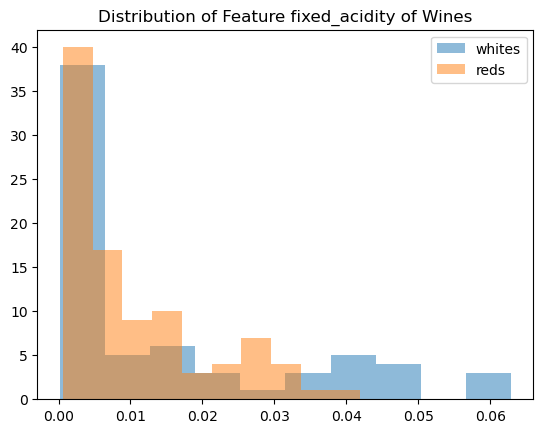

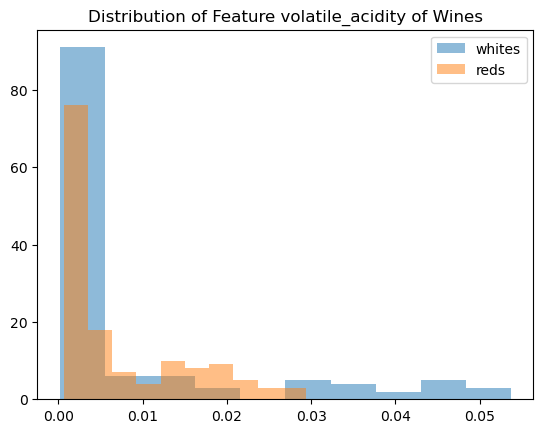

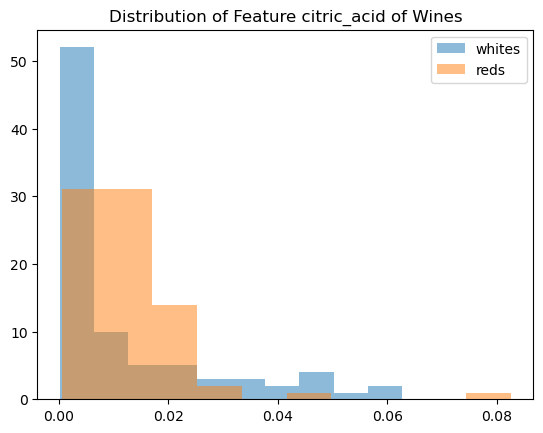

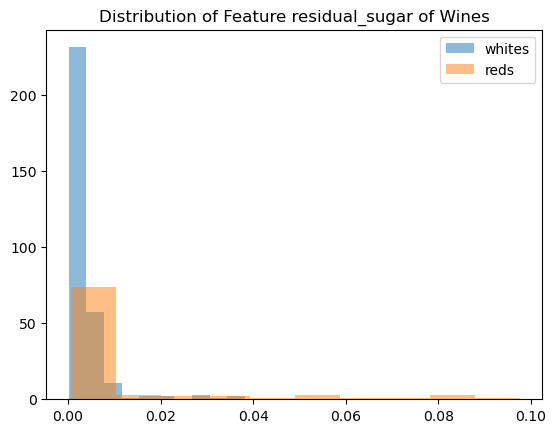

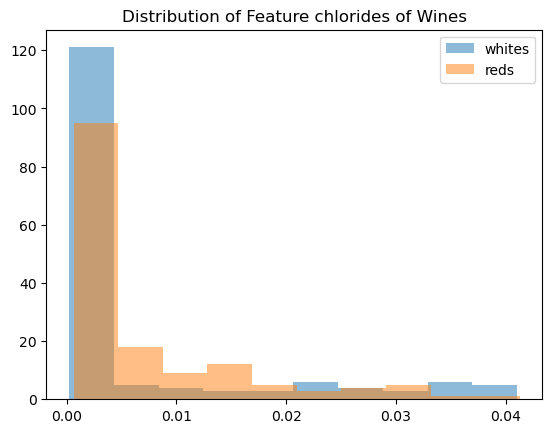

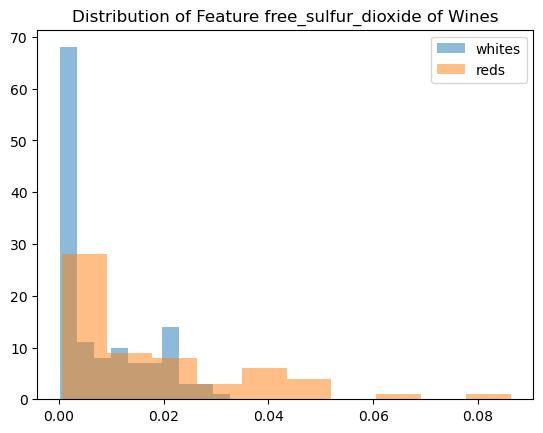

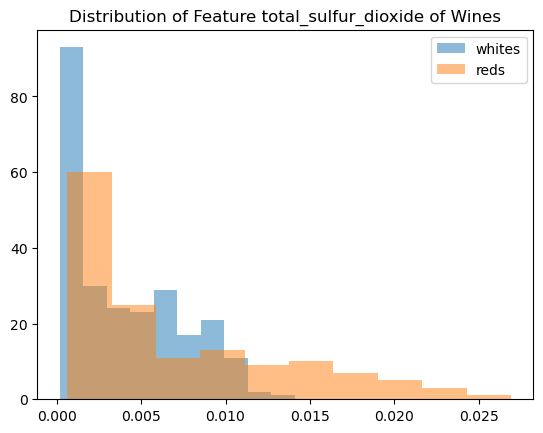

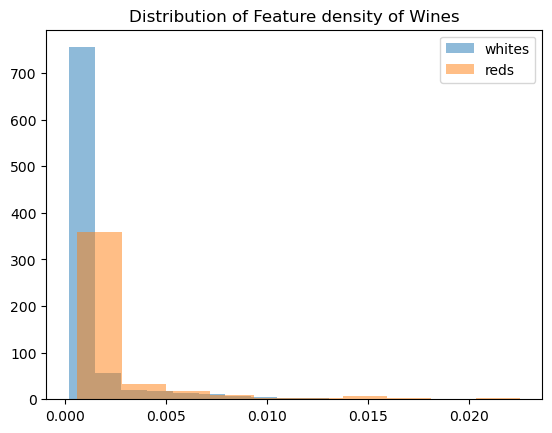

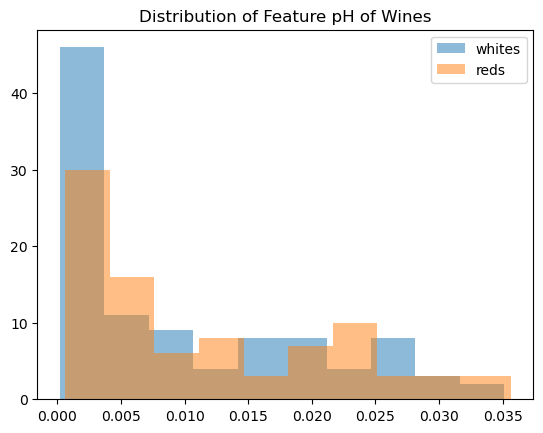

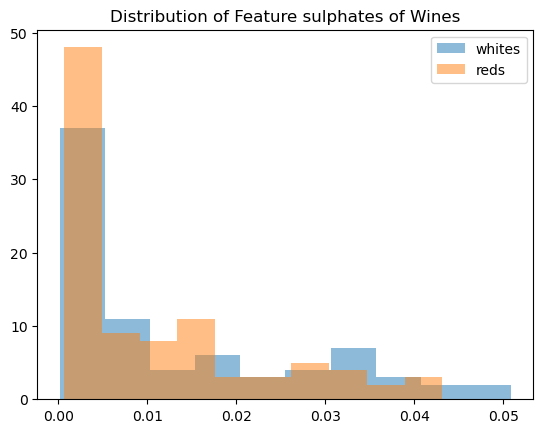

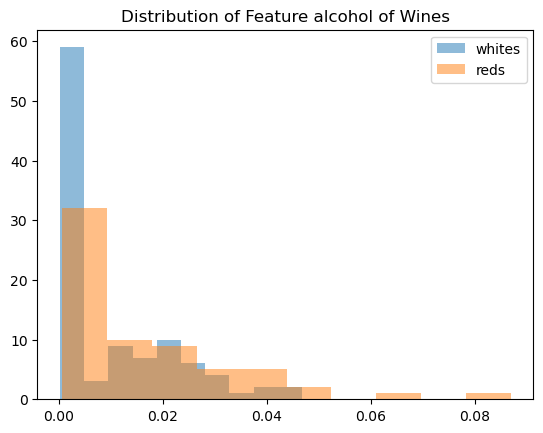

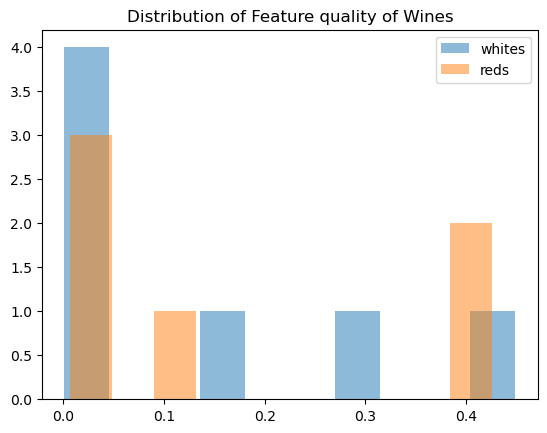

In [56]:

for col in cols:
    plt.hist((whites[col].value_counts(normalize=True)), alpha=.5)
    plt.hist((reds[col].value_counts(normalize=True)), alpha=.5)
    plt.title(f'Distribution of Feature {col} of Wines')
    plt.legend(labels=['whites', 'reds'])
    plt.show()

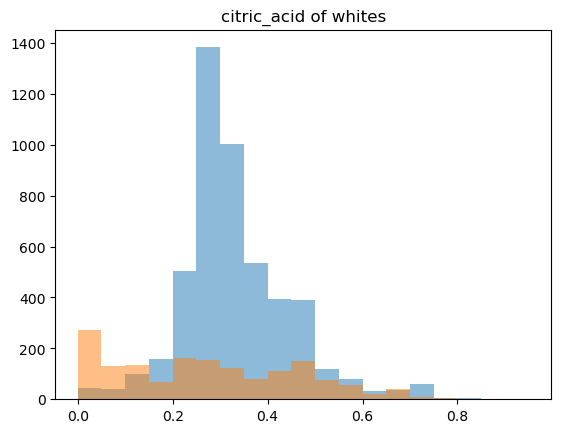

In [61]:
plt.hist(whites.citric_acid, np.arange(0,1,0.05), alpha=.5)
plt.hist(reds.citric_acid, np.arange(0,1,0.05), alpha=.5)
plt.title('citric_acid of whites')
plt.show()

In [16]:
# citric acid is actually more normal than first showed for whites, but not reds

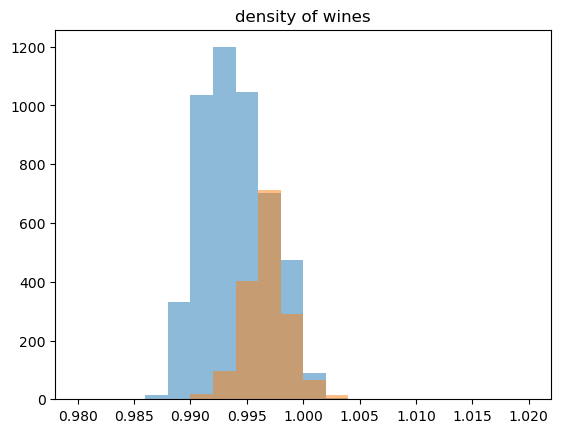

In [65]:
plt.hist(whites.density, np.arange(.98, 1.02, .002), alpha=0.5)
plt.hist(reds.density, np.arange(.98, 1.02, .002), alpha=0.5)
plt.title('density of wines')
plt.show()

In [21]:
# densities also more normal than first appeared

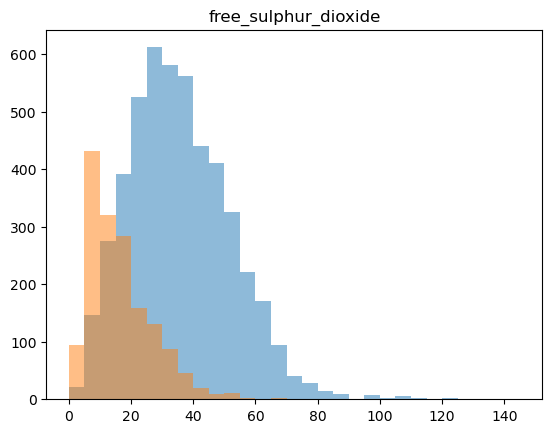

In [66]:
plt.hist(whites.free_sulfur_dioxide, np.arange(0, 150, 5), alpha=0.5)
plt.hist(reds.free_sulfur_dioxide, np.arange(0, 150, 5), alpha=0.5)

plt.title('free_sulphur_dioxide')
plt.show()

In [67]:
# free sulphur dioxide is right skewed

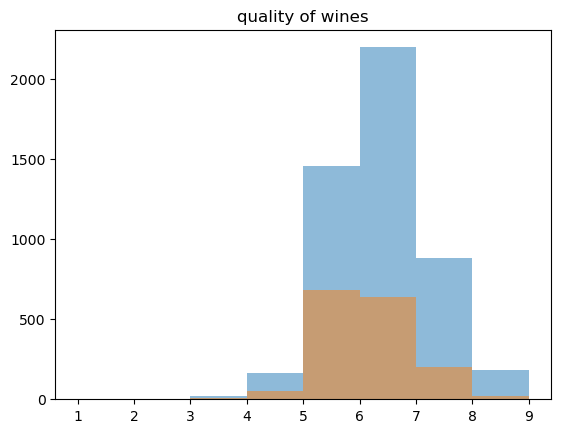

In [68]:
plt.hist(whites.quality, range(1,10), alpha=0.5)
plt.hist(reds.quality, range(1,10), alpha=0.5)
plt.title('quality of wines')
plt.show()

In [ ]:
# with the right bins, quality scores are roughly normal as well

**Univarate Summary**
- No. of whites = 4898, No. of reds = 1599
- Quality, fixed acidity, total sulphur dioxide, pH, density, and citric acid are fairly normally distributed.
- Alcohol, sulphates, free sulphur dioxide, chlorides, residual sugar, and volatile acidity are right skewed.

### Bivariate Exploration

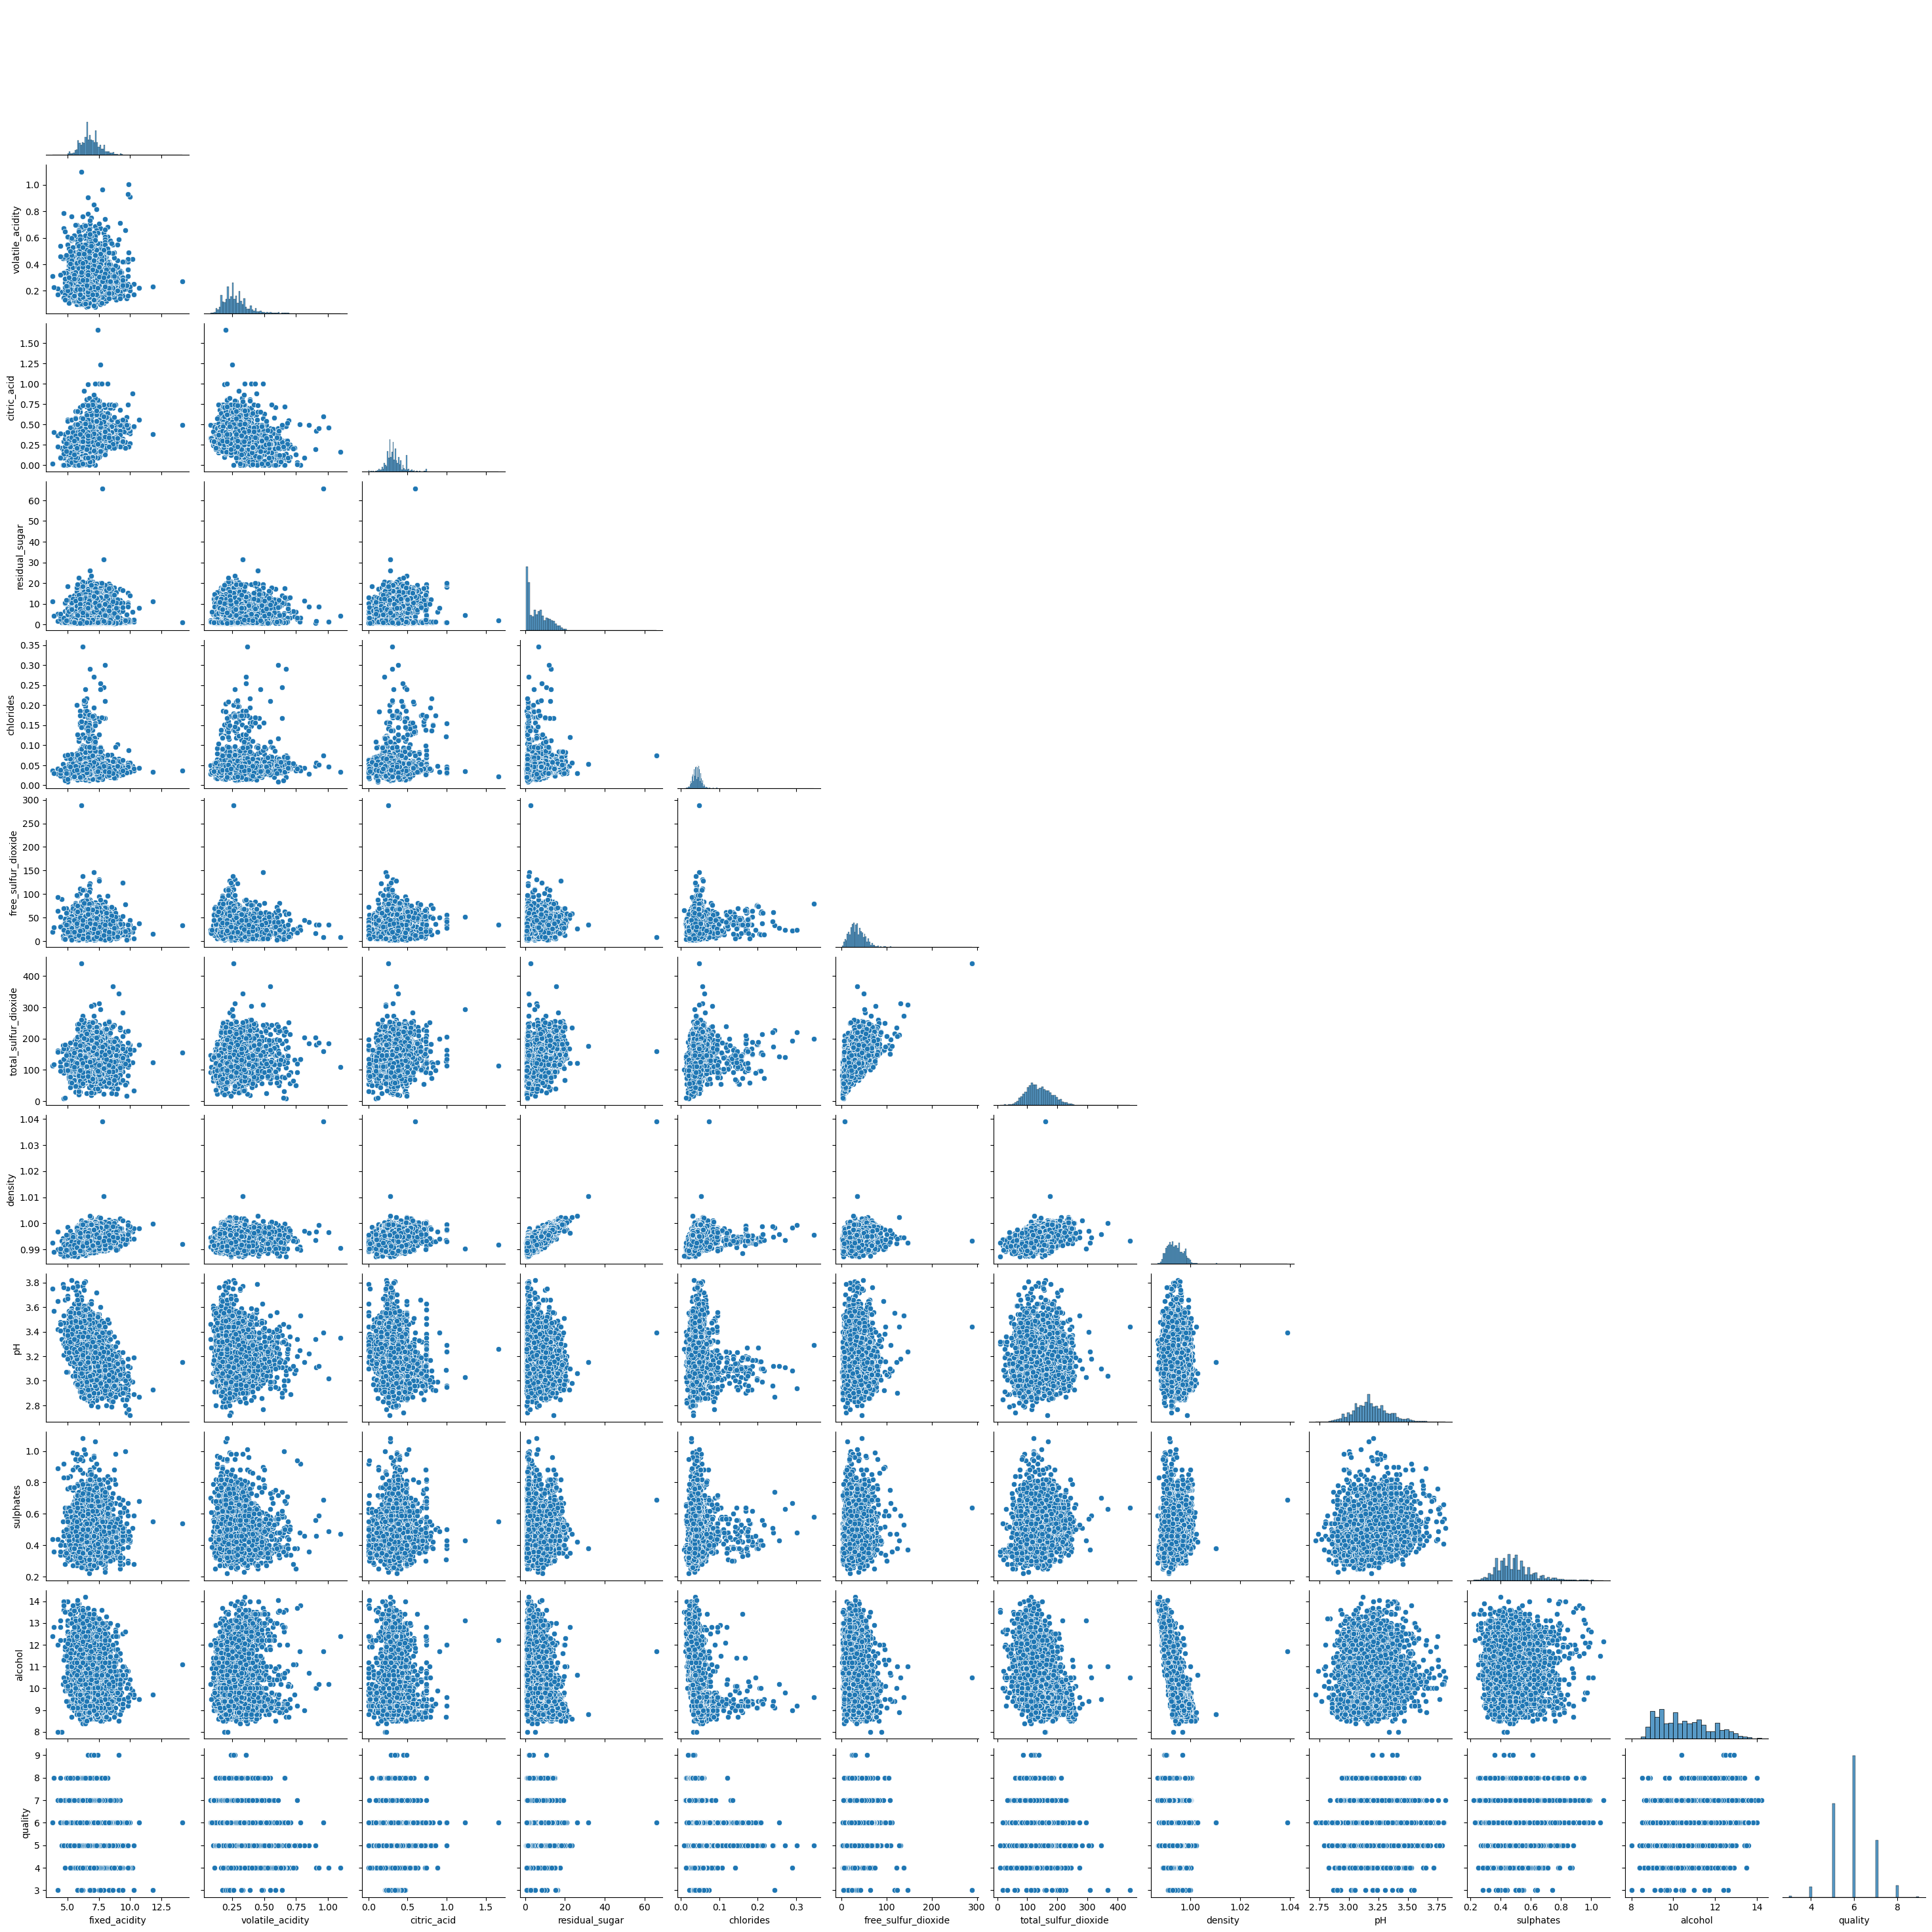

In [74]:
sns.pairplot(data=whites, corner=True)